In [ ]:
import tkinter as tk
from tkinter import ttk, filedialog
from Functions import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
def calculate(function,input,*output):
    if function=="Scaling_exponent_and_amplitude":
        data,scale=input
        returns=Scaling_exponent_and_amplitude(data,str(scale))
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
        
    elif function=="Scaling_form_RG_chain":
        data,order=input
        returns=Scaling_form_RG_chain(data,order)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    elif function=="Rg_chain_prediction":
        N,type,data=input
        returns=Rg_chain_prediction(N,type,data)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    elif function=="finit_size_scaling":
        data=input
        returns=finit_size_scaling(data)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    elif function=="Is_there_scaling":
        data,step=input
        returns=Is_there_scaling(data,step)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    elif function=="g1_g3":
        data,step,minsize,accuracy=input
        returns=g1_g3(data,step,minsize,accuracy)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    else: 
        data,mol_num=input
        returns=Autocorrelation(data,mol_num)
        newWindow = tk.Toplevel(wind)
        newWindow.title("Results of the calculation")
        newWindow.geometry("400x100")
        tk.Label(newWindow,text=returns[-1]).pack()
    for i in range(len(returns)):
        output[i].set(returns[i])


In [8]:
def display_picture(function,start):
      newWindow = tk.Toplevel(wind)
      newWindow.title("Fit to the data")
      newWindow.geometry("600x600")
      data=tk.StringVar(value="data")

      file = filedialog.askopenfile(mode='r', defaultextension='.csv',filetypes=[('Text Files', '*.csv'),('Text Files', '*.txt'),('Text Files', '*.dat')])
      if file:
            content = file.read()
            file.close()
            data.set(content)
      fig,ax=plt.subplots()
      canvas=FigureCanvasTkAgg(fig,master=newWindow)
      ##input data to the figure
      input_data=text_to_DataFrame(data.get())
      start=int(start.get())
      if function=="Scaling_exponent_and_amplitude":
            x=np.log(np.array(input_data[0]))
            y=np.log(np.array(input_data[1]))
            model=LinearRegression()
            model.fit(x[start:].reshape((-1,1)),y[start:])
            if y.size<1000:
                ax.scatter(x,y,color="black",label="data",s=5)
            else:
               ax.plot(x,y,color="black",label="data") 
            ax.plot(x[start:],model.predict(x[start:].reshape((-1,1))),color='red',label="fit")
            plt.legend()
            plt.xlabel("Natural log of number of monomers")
            plt.ylabel("Natural log of size characteristic")
      elif function=="finit_size_scaling":
            x=np.array(input_data[0])**(-0.528)
            y=np.array(input_data[1])
            model=LinearRegression()
            poly = PolynomialFeatures(degree=2, include_bias=False)
            poly_features = poly.fit_transform(x.reshape(-1, 1))
            model.fit(poly_features[start:],y[start:])
            ax.scatter(x,y,color="black",label="data",s=5)
            ax.plot(x[start:],model.predict(poly_features[start:]),color='red',label="fit")
            plt.legend()
            plt.xlabel("$N^{-\\Delta}$")
            plt.ylabel("Universal characteristic")
      else:
            x=np.log(np.array(input_data[0])[1:])
            y=np.log(np.array(input_data[1])[1:])
            model=LinearRegression()
            model.fit(x[start:].reshape((-1,1)),y[start:])
            if y.size<1000:
                  ax.scatter(x,y,color="black",label="data",s=5)
            else:
                  ax.plot(x,y,color="black",label="data") 
            ax.plot(x[start:],model.predict(x[start:].reshape((-1,1))),color='red',label="fit")
            plt.legend()
            plt.xlabel("Natural log of time")
            plt.ylabel("Natural log of dynamic characteristic")
      canvas.draw()
      toolbar=NavigationToolbar2Tk(canvas,newWindow,pack_toolbar=False)
      toolbar.update()
      toolbar.pack(anchor="w",fill=tk.X)

      canvas.get_tk_widget().pack()

def data_preparation():
      newWindow = tk.Toplevel(wind)
      newWindow.title("Results of the calculation")
      newWindow.geometry("400x400")
      message="""The data for the functions has to be prepared\n as a text file that contains two columns.\n
      1. Calculation of amplitude and exponent can\n be done for a data in eather lin-lin or log-log scales\n
      2. To get the amplitudes for a scaling form of\n the size characteristic data has to be in lin-lin scale"""
      tk.Label(newWindow,text=message).pack()
      
    

C:\Users\Khristine\AppData\Local\Temp\ipykernel_15024\2345587776.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return start,model.coef_,score,f"Starting from time {int(np.exp(X[start]))} from {int(np.exp(X[-1]))} \n linear approximation gives an exponent {model.coef_}\n with model fitting accuracy of {score}"
C:\Users\Khristine\AppData\Local\Temp\ipykernel_15024\2345587776.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return start,model.coef_,score,f"Starting from time {int(np.exp(X[start]))} from {int(np.exp(X[-1]))} \n linear approximation gives an exponent {model.coef_}\n with model fitting accuracy of {score}"
C:\Users\K

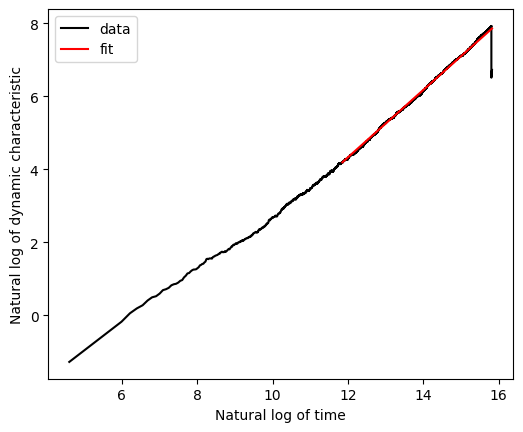

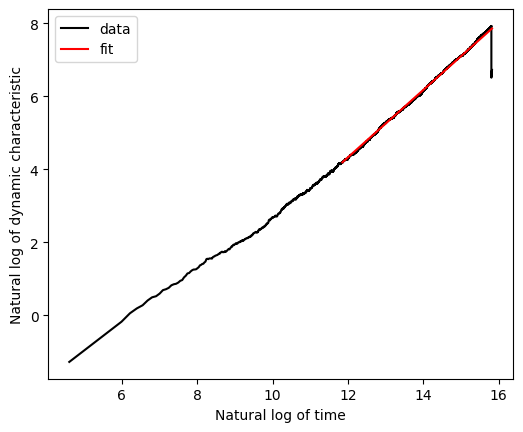

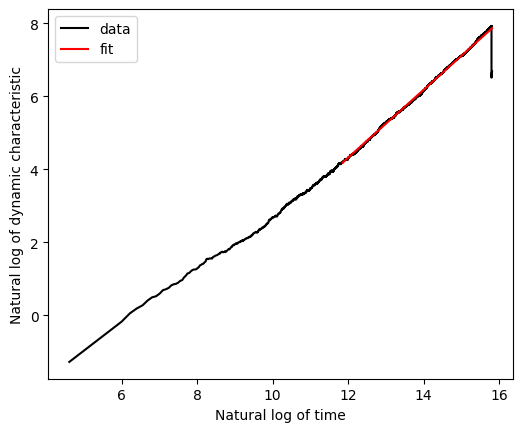

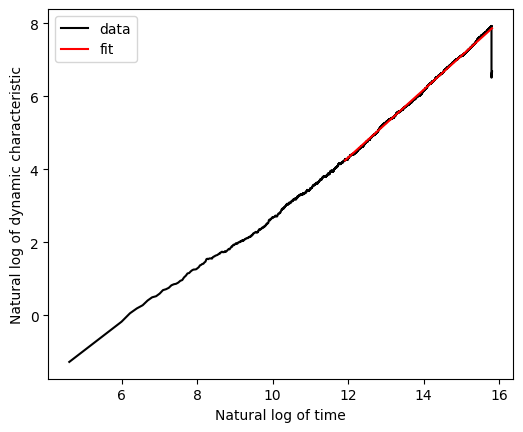

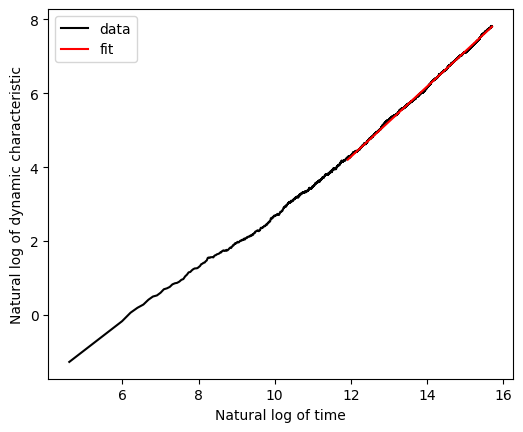

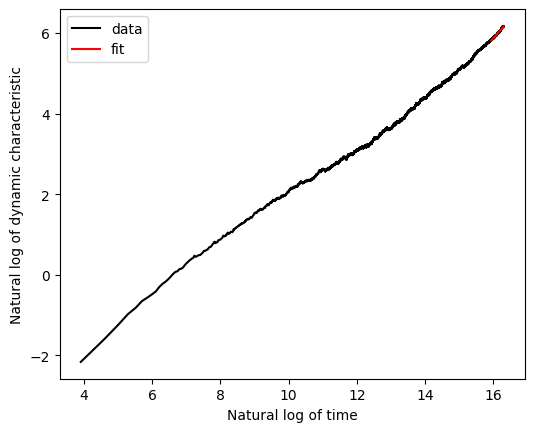

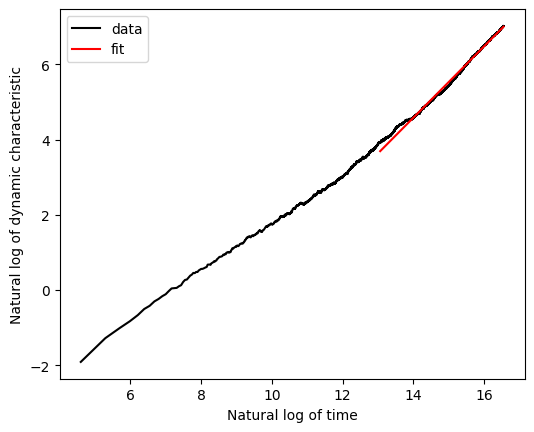

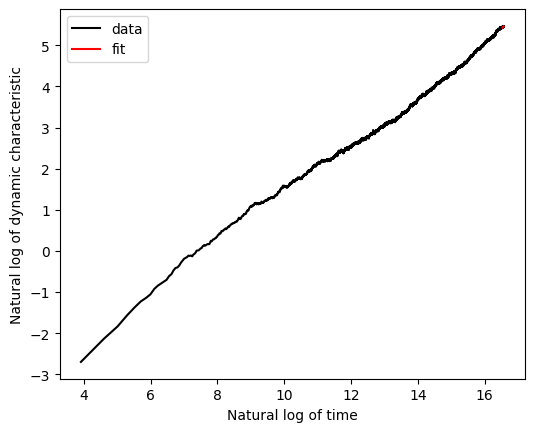

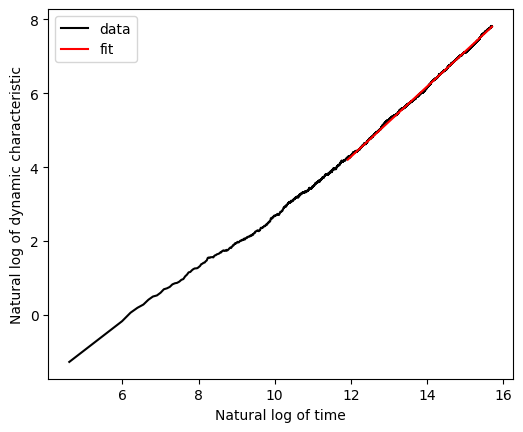

In [10]:
root=tk.Tk()
root.title("Scaling and such")
root.geometry('400x800')
root.resizable(0, 0)

###Building a scroll bar on the canvas
main_frame=tk.Frame(root)
main_frame.pack(fill='both',expand=1)

canvas=tk.Canvas(main_frame)
canvas.pack(side='left', fill='both',expand=1)

scrolbar=ttk.Scrollbar(main_frame,orient="vertical",command=canvas.yview)
scrolbar.pack(side="right",fill="y")

canvas.configure(yscrollcommand=scrolbar.set)
canvas.bind("<Configure>",lambda e:canvas.configure(scrollregion=canvas.bbox("all")))

wind=tk.Frame(canvas)
canvas.create_window((0,0),window=wind,anchor="nw")

### variables
scales=("lin-lin","log-log")
scale=tk.StringVar(value="lin-lin")
order=tk.StringVar(value="2")
start=tk.StringVar(value="0")
accuracy_Rg=tk.StringVar(value="")
amplitude=tk.StringVar(value="")
exponent=tk.StringVar(value="")
message_nu=tk.StringVar(value="")
message_amp=tk.StringVar(value="")
message_FS=tk.StringVar(value="")
message_RG=tk.StringVar(value="")
message_Scaling=tk.StringVar(value="")
N=tk.StringVar(value="1")
step=tk.StringVar(value="1")
step_g=tk.StringVar(value="100")
sc=tk.StringVar(value="")
scale.set("lin-lin")
order.set("2")
minsize=tk.StringVar(value="5000")
accuracy=tk.StringVar(value="0.05")
message_diff=tk.StringVar(value="")
num_mol=tk.StringVar(value="1")
message_auto=tk.StringVar(value="")
coef=tk.StringVar(value="")
score=tk.StringVar(value="")

title=tk.Label(wind,
                text="Size Scaling and diffution in polymers",
                font="Calibri 14 bold",anchor=tk.CENTER).pack(fill=tk.X)
tk.Label(wind,text=("This is a pack of functions that works with scaling\n in polymers. Please chose the data for processing\n (.csv,.txt or .dat)"),
                      font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
tk.Button(wind, text="Instructions", command=data_preparation).pack()


### Scaling exponent and amplitude
tk.Label(wind,
                text=("It allows to:\n"+
                "1. Get a calculation of amplitude and exponent \n for a data that is expected to have a scaling behavour"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
Frame_nu=tk.Frame(wind)
Frame_nu.columnconfigure(3)
Frame_nu.rowconfigure(1)
tk.OptionMenu(Frame_nu,scale,*scales).grid(row=0,column=0)
ttk.Button(Frame_nu, text="Calculate", command=lambda:calculate("Scaling_exponent_and_amplitude",(open_file(),scale.get()),start,accuracy_Rg,amplitude,exponent,message_nu)).grid(row=0,column=1)
ttk.Button(Frame_nu, text="Show the fit", command=lambda:display_picture("Scaling_exponent_and_amplitude",start)).grid(row=0,column=2)
Frame_nu.pack()
### Amplitudes for a full scaling form
tk.Label(wind,
                text=("2. Get a calculation of amplitudes for a size\n characteristic using known values of both size exponent \n and correction to scaling exponent"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
Frame_par=tk.Frame(wind)
Frame_par.columnconfigure(2)
Frame_par.rowconfigure(2)
tk.Label(Frame_par,
                text=("Please provide 1 if data has size characteristic and not its square"),
                font="Calibri 10",anchor=tk.CENTER).grid(row=0,column=0,columnspan=2)
tk.Entry(Frame_par,textvariable=order).grid(row=1,column=0)
ttk.Button(Frame_par, text="Calculate", command=lambda:calculate("Scaling_form_RG_chain",(open_file(),order.get()),amplitude,exponent,message_amp)).grid(row=1,column=1)
Frame_par.pack()

### Prediction of Rg for a given N

tk.Label(wind,
                text=("3. Get a prediction of gyration radius value \n for a linear chain with N monomers"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
Frame_pred=tk.Frame(wind)
Frame_pred.columnconfigure(3)
Frame_pred.rowconfigure(2)
Sim_type=tk.StringVar(value=None)
methods=("MD(build-in)","MC(build-in)","From my data")
Sim_type.set("From my data")
tk.OptionMenu(Frame_pred,Sim_type,*methods).grid(row=1,column=0)
tk.Label(Frame_pred,text="Number of monomers").grid(row=0,column=1)
tk.Entry(Frame_pred,textvariable=N).grid(row=1,column=1)
st=Sim_type.get()
def file(st):
    if st == "From my data": return open_file()
ttk.Button(Frame_pred, text="Calculate", command=lambda:calculate("Rg_chain_prediction",(N.get(),Sim_type.get(),file(Sim_type.get())),amplitude,exponent,message_RG)).grid(row=1,column=2)
Frame_pred.pack()

###finit size scaling
Frame_fin=tk.Frame(wind)
Frame_fin.columnconfigure(2)
Frame_fin.rowconfigure(1)
tk.Label(wind,
                text=("4. Finit size scaling calculation for\n size ratios and shape characteristics"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
ttk.Button(Frame_fin, text="Calculate", command=lambda:calculate("finit_size_scaling",(open_file()),start,amplitude,exponent,message_FS)).grid(row=0,column=0)
ttk.Button(Frame_fin, text="Show the fit", command=lambda:display_picture("finit_size_scaling",start)).grid(row=0,column=1)
Frame_fin.pack()
###Is there scaling
tk.Label(wind,
                text=("5. Checks if there is power law or\n exponential dependance in the tail of data"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
tk.Label(wind,text="A number of points added to the cutoff on each iteration step").pack()
tk.Entry(wind,textvariable=step).pack()
ttk.Button(wind, text="Calculate", command=lambda:calculate("Is_there_scaling",(open_file(),step.get()),amplitude,exponent,message_Scaling)).pack()


### diffution search
tk.Label(wind,
                text=("6. Checks if there is a diffusive behavior\n on long times for dynamic functions in melt"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)

tk.Label(wind,text="A number of points added to the cutoff on each iteration step").pack()
tk.Entry(wind,textvariable=step_g).pack()
tk.Label(wind,text="Minimum number of data points over which the fit is to be calculated").pack()
tk.Entry(wind,textvariable=minsize).pack()
tk.Label(wind,text="How close to 1 the exponent has to be").pack()
tk.Entry(wind,textvariable=accuracy).pack()
Frame_diff=tk.Frame(wind)
Frame_diff.columnconfigure(2)
Frame_diff.rowconfigure(1)
ttk.Button(Frame_diff, text="Calculate", command=lambda:calculate("g1_g3",(open_file(),step_g.get(),minsize.get(),accuracy.get()),start,coef,score,message_diff)).grid(row=0,column=0)
ttk.Button(Frame_diff, text="Show the fit", command=lambda:display_picture("g1_g3",start)).grid(row=0,column=1)
Frame_diff.pack()

tk.Label(wind,
                text=("7. Calculates a relaxation time\n from autocorrelation function"),
                font="Calibri 12",anchor=tk.CENTER).pack(fill=tk.X)
tk.Label(wind,text="Number of molecules in the simulation box").pack()
tk.Entry(wind,textvariable=num_mol).pack()
ttk.Button(wind, text="Calculate", command=lambda:calculate("Autocorrelation",(open_file(),num_mol.get()),amplitude,exponent,message_auto)).pack()
tk.Label(wind,text="").pack()
root.mainloop()

In [6]:
def g1_g3(data,step=100,minsize=5000,accuracy=0.05):
    '''This function is designed to look for an exponent of 1 as a final regime of dynamic fuctions g1 and g3
    Input
    data -- a pd.DataFrame that contains two columns one for time second for g1 or g3 in linear scale
    step -- a size of the step in the loop by definition is 100
    minsize --- minimum number of points that are consideered or the fit
    accuracy -- a difference between the received exponent and 1'''
    step=int(step)
    minsize=int(minsize)
    accuracy=float(accuracy)
    if type(data)==str:
        data=text_to_DataFrame(data)
    try:
        model=LinearRegression()
        X=np.array(np.log(data.iloc[1:,0])).reshape((-1,1))
        y=np.array(np.log(data.iloc[1:,1]))
        start=0
        diff=0.5
        for i in range(1,y.size-minsize,step):
            model.fit(X[i:],y[i:])
            if abs(model.coef_-1.0)<diff: 
                if abs(model.coef_-1.0)>accuracy:
                    diff=abs(model.coef_-1.0)
                    start=i
                    score=model.score(X[i:],y[i:])
                else:
                    break
        
        score=model.score(X[start:],y[start:])
        return start,model.coef_,score,f"Starting from time {int(np.exp(X[start]))} from {int(np.exp(X[-1]))} \n linear approximation gives an exponent {model.coef_}\n with model fitting accuracy of {score}"
    except:
        return np.nan,np.nan,"Please check if the data is correct"

In [26]:
data=np.loadtxt("F:\\Molecular Dynamics\\Auto\\C120\\g3.dat")
time=np.arange(data.size)*100
np.savetxt("F:\\Molecular Dynamics\\Auto\\C120\\g3.txt",np.vstack((time,data)).T)

In [3]:
Source="F:\\Molecular Dynamics\\Auto\\DB240\\"
data=np.hstack((np.loadtxt(Source+"GyrationRadius_1.dat"),np.loadtxt(Source+"GyrationRadius_2.dat"),np.loadtxt(Source+"GyrationRadius_3.dat"),np.loadtxt(Source+"GyrationRadius_4.dat")
,np.loadtxt(Source+"GyrationRadius_5.dat"),np.loadtxt(Source+"GyrationRadius_6.dat"),np.loadtxt(Source+"GyrationRadius_7.dat"),np.loadtxt(Source+"GyrationRadius_8.dat")))
data=data.reshape(data.shape[0]//512,512)
time=(np.arange(data.shape[0])*50).reshape((-1,1))
np.savetxt("F:\\Molecular Dynamics\\Auto\\DB240\\Rg.txt",np.hstack((time,data)))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 313048 and the array at index 1 has size 512

In [10]:
time=(np.arange(data.shape[0])*50).reshape((-1,1))
print(data.shape,time.shape)
np.savetxt("F:\\Molecular Dynamics\\Auto\\DB240\\Rg.txt",np.hstack((time,data)))

(313048, 512) (313048, 1)


In [13]:
Source="F:\\Molecular Dynamics\\Auto\\DB120\\"
data=np.hstack((np.loadtxt(Source+"GyrationRadius1.dat"),np.loadtxt(Source+"GyrationRadius2.dat"),np.loadtxt(Source+"GyrationRadius3.dat"),np.loadtxt(Source+"GyrationRadius4.dat")
,np.loadtxt(Source+"GyrationRadius5.dat"),np.loadtxt(Source+"GyrationRadius6.dat")))
data=data.reshape(data.shape[0]//512,512)
time=(np.arange(data.shape[0])*50).reshape((-1,1))
np.savetxt("F:\\Molecular Dynamics\\Auto\\DB120\\Rg.txt",np.hstack((time,data)))

In [12]:
data.shape,time.shape

((153254400,), (153254400, 1))

In [14]:
Source="F:\\Molecular Dynamics\\Auto\\C240\\"
data=np.hstack((np.loadtxt(Source+"GyrationRadius1.dat"),np.loadtxt(Source+"GyrationRadius2.dat"),np.loadtxt(Source+"GyrationRadius3.dat"),np.loadtxt(Source+"GyrationRadius4.dat")))
data=data.reshape(data.shape[0]//512,512)
time=(np.arange(data.shape[0])*100).reshape((-1,1))
np.savetxt("F:\\Molecular Dynamics\\Auto\\C240\\Rg.txt",np.hstack((time,data)))

In [15]:
Source="F:\\Molecular Dynamics\\Auto\\C120\\"
data=np.hstack((np.loadtxt(Source+"GyrationRadius1.dat"),np.loadtxt(Source+"GyrationRadius2.dat"),np.loadtxt(Source+"GyrationRadius3.dat")))
data=data.reshape(data.shape[0]//512,512)
time=(np.arange(data.shape[0])*100).reshape((-1,1))
np.savetxt("F:\\Molecular Dynamics\\Auto\\C120\\Rg.txt",np.hstack((time,data)))

In [2]:
import numpy as np
Source="F:\\Molecular Dynamics\\Auto\\C120\\"
data=np.loadtxt(Source+"Rg.txt")

In [15]:
samples=[]
while len(samples)<10:
    samples.append(np.random.randint(1,513))
samples

[395, 467, 430, 396, 341, 3, 355, 241, 309, 379]

In [16]:
data[:,0].shape

(179358,)

In [31]:
def Autocorrelation(data,mol_num):
    '''This function is desighned to provide a calculation of autocorreration function and fron it the relaxation time
    it uses three different aproaches for calculations
    input a time series to be correlated 
        
        data -- np.array

        tau -- itteration step float
        dump_step -- number of simulation steps between recording of the data
        mol_number -- number of moleules in the box
        time -- np.array of time values if avaliable


        return -- correlation time, max time of date'''
    mol_num=int(mol_num)
    if type(data)==str:
        data=text_to_DataFrame(data)
    print(data.shape)
    try:
        time=np.array(data.iloc[:,0])
        print(time.shape)
        rg_r=np.array(data.iloc[:,1:])
        print(rg_r.shape)
        corr=np.zeros(rg_r.shape)
        print(corr.shape)
        for i in range(mol_num):
            print(rg_r[:,i].shape,corr[:,i].shape)
            corr[:,i]=acf(rg_r[:,i],nlags=rg_r.shape[0])
        cor=np.mean(corr,axis=1)
        rel_time=np.trapz(cor[cor>0],time[cor>0])
        return rel_time,time[-1],f"Relaxation time = {rel_time}\n Full time = {time[-1]}"
    except:
        return np.nan,np.nan,"Please check if the data is correct"

In [33]:
from statsmodels.tsa.stattools import acf
Autocorrelation(pd.DataFrame(data),512)

(179358, 513)
(179358,)
(179358, 512)
(179358, 512)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,) (179358,)
(179358,

(176118.46232083658,
 17935700.0,
 'Relaxation time = 176118.46232083658\n Full time = 17935700.0')